In [1]:
from rxitect.models.vanilla.generator import VanillaGenerator
from rxitect.structs.vocabulary import SelfiesVocabulary
from rdkit.Chem import Draw
from rdkit import Chem
from typing import List

import torch
import selfies as sf

In [2]:
voc = SelfiesVocabulary(vocabulary_file_path="../data/processed/selfies_voc.txt")
gen = VanillaGenerator(voc=voc)

In [3]:
gen.load_state_dict(torch.load("../models/27022022_epoch=49.pkg"))

<All keys matched successfully>

In [4]:
gen.eval()

VanillaGenerator(
  (embed): Embedding(86, 128)
  (rnn): LSTM(128, 512, num_layers=3, batch_first=True)
  (linear): Linear(in_features=512, out_features=86, bias=True)
)

In [5]:
samples = gen.sample(10)

In [6]:
def draw_sampled_selfies(sampled_selfies: torch.Tensor) -> List[str]:
    """
    Helper function that takes generated encoded SELFIES tensors,
    decodes them to SMILES and draws them on screen.
    """
    dec_sampled = [voc.decode(x) for x in sampled_selfies]
    smiles = [sf.decoder(x) for x in dec_sampled]
    Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smiles])
    return smiles

In [7]:
smiles =draw_sampled_selfies(samples)

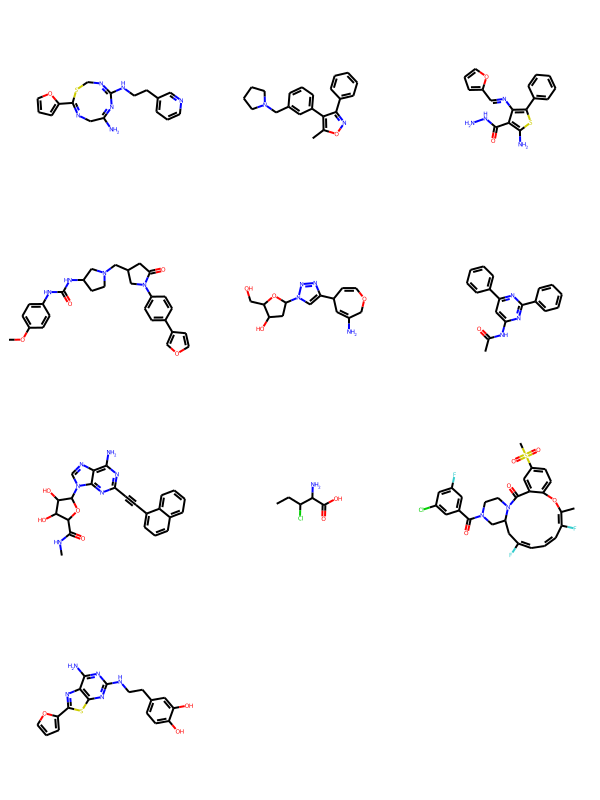

In [8]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smiles])